# Part A: Exploratory Data Analysis (EDA)

Reference: https://www.geeksforgeeks.org/data-analysis/exploratory-data-analysis-in-python/

In [2]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pathlib import Path
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
print(f"Current Working Directory: {os.getcwd()}")
print(f"Files in current directory: {os.listdir()}")
output_dir = Path('../outputs')
output_dir.mkdir(parents=True, exist_ok=True)

Current Working Directory: /Users/abdulhafeez/Downloads/Deep-Learning/assignment_1/notebooks
Files in current directory: ['eda.py', 'mlp.ipynb']


### Dataset Structure

In [4]:
# Load data
DATA_DIR = '../data'
full_train_df = pd.read_csv(f'{DATA_DIR}/train.csv')
test_df  = pd.read_csv(f'{DATA_DIR}/test.csv')

full_train_df.head(10)

,neighbourhood_group,room_type,minimum_nights,amenity_score,number_of_reviews,availability_365,price_class
0,Manhattan,NaN,2.0,82.5,15.0,254.0,3
1,Manhattan,Private room,2.0,53.7,1.0,0.0,1
2,Brooklyn,Private room,2.0,47.8,70.0,90.0,1
3,Manhattan,Entire home/apt,2.0,58.8,1.0,NaN,1
4,Bronx,Private room,2.0,32.2,0.0,89.0,1
5,Manhattan,Private room,5.0,48.6,2.0,6.0,1
6,Manhattan,Private room,2.0,11.5,12.0,45.0,0
7,Manhattan,Entire home/apt,2.0,84.9,9.0,0.0,2
8,Brooklyn,Entire home/apt,2.0,44.2,23.0,190.0,1
9,Manhattan,Entire home/apt,30.0,27.7,3.0,82.0,0


In [5]:
# Dataset structure
print(f"Dimensions of full_train set: {full_train_df.shape}")
print(f"Dimensions of test set: {test_df.shape}\n")
print(f"Summary of full_train set:\n{full_train_df.info()}\n")


Dimensions of full_train set: (41348, 7)
Dimensions of test set: (7297, 7)

<class 'pandas.DataFrame'>
RangeIndex: 41348 entries, 0 to 41347
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  40509 non-null  str    
 1   room_type            40737 non-null  str    
 2   minimum_nights       40026 non-null  float64
 3   amenity_score        40432 non-null  float64
 4   number_of_reviews    40225 non-null  float64
 5   availability_365     40753 non-null  float64
 6   price_class          41348 non-null  int64  
dtypes: float64(4), int64(1), str(2)
memory usage: 2.2 MB
Summary of full_train set:
None



In [6]:
print(f"Summary of test set:\n{test_df.info()}")

<class 'pandas.DataFrame'>
RangeIndex: 7297 entries, 0 to 7296
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  7297 non-null   str    
 1   room_type            7297 non-null   str    
 2   minimum_nights       7297 non-null   int64  
 3   amenity_score        7297 non-null   float64
 4   number_of_reviews    7297 non-null   int64  
 5   availability_365     7297 non-null   int64  
 6   price_class          7297 non-null   int64  
dtypes: float64(1), int64(4), str(2)
memory usage: 399.2 KB
Summary of test set:
None


In [7]:
# Descriptive Statistics
print(f"Descriptive statistics of full_train set:\n{full_train_df.describe()}\n")

Descriptive statistics of full_train set:
       minimum_nights  amenity_score  number_of_reviews  availability_365  \
count    40026.000000   40432.000000       40225.000000      40753.000000   
mean         7.002873      51.987233          23.648154        111.912178   
std         19.725353      19.459480          44.518303        131.273916   
min          1.000000      10.000000           0.000000          0.000000   
25%          1.000000      36.800000           1.000000          0.000000   
50%          3.000000      51.400000           5.000000         44.000000   
75%          5.000000      66.100000          24.000000        224.000000   
max       1000.000000      99.000000         607.000000        365.000000   

        price_class  
count  41348.000000  
mean       1.231619  
std        0.758579  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max        3.000000  



In [8]:
cat_cols = ['neighbourhood_group', 'room_type']
for col in cat_cols:
    print(f"Unique Values: {full_train_df[col].unique()}")
    print("\nValue Counts:")
    print(full_train_df[col].value_counts(dropna=False))
    print("\n")

Unique Values: <StringArray>
['Manhattan', 'Brooklyn', 'Bronx', 'Queens', 'Staten Island', nan]
Length: 6, dtype: str

Value Counts:
neighbourhood_group
Manhattan        17905
Brooklyn         16692
Queens            4696
Bronx              907
NaN                839
Staten Island      309
Name: count, dtype: int64


Unique Values: <StringArray>
[nan, 'Private room', 'Entire home/apt', 'Shared room']
Length: 4, dtype: str

Value Counts:
room_type
Entire home/apt    21099
Private room       18663
Shared room          975
NaN                  611
Name: count, dtype: int64




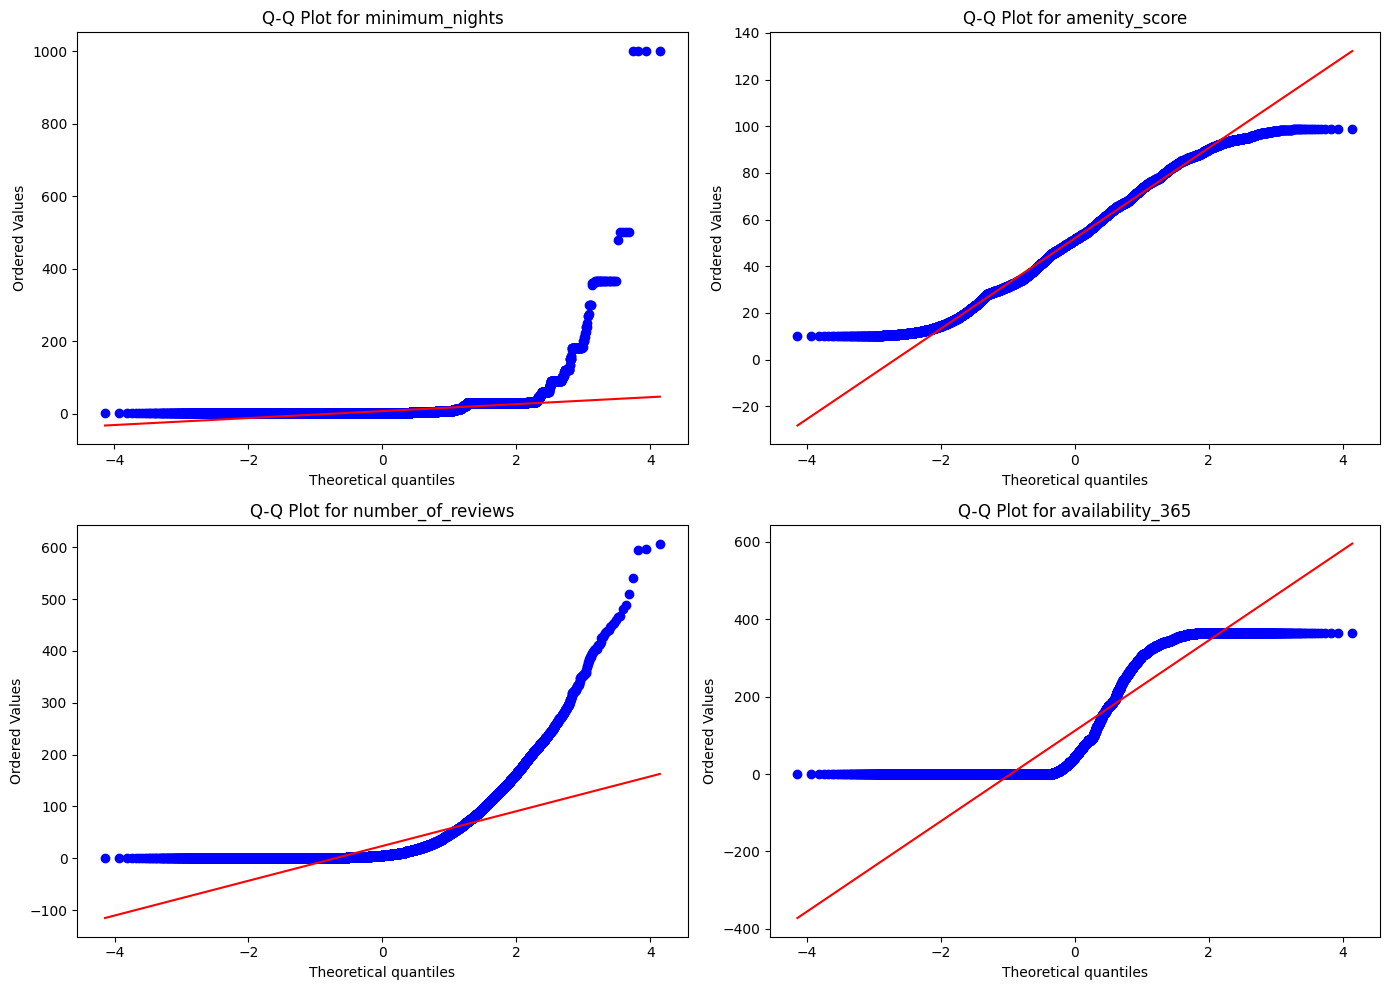

In [9]:
# Numeric columns
num_cols = ['minimum_nights', 'amenity_score', 'number_of_reviews', 'availability_365']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    stats.probplot(full_train_df[col].dropna(), dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q Plot for {col}')

plt.tight_layout()
save_path = output_dir / 'numeric_qq_plots.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

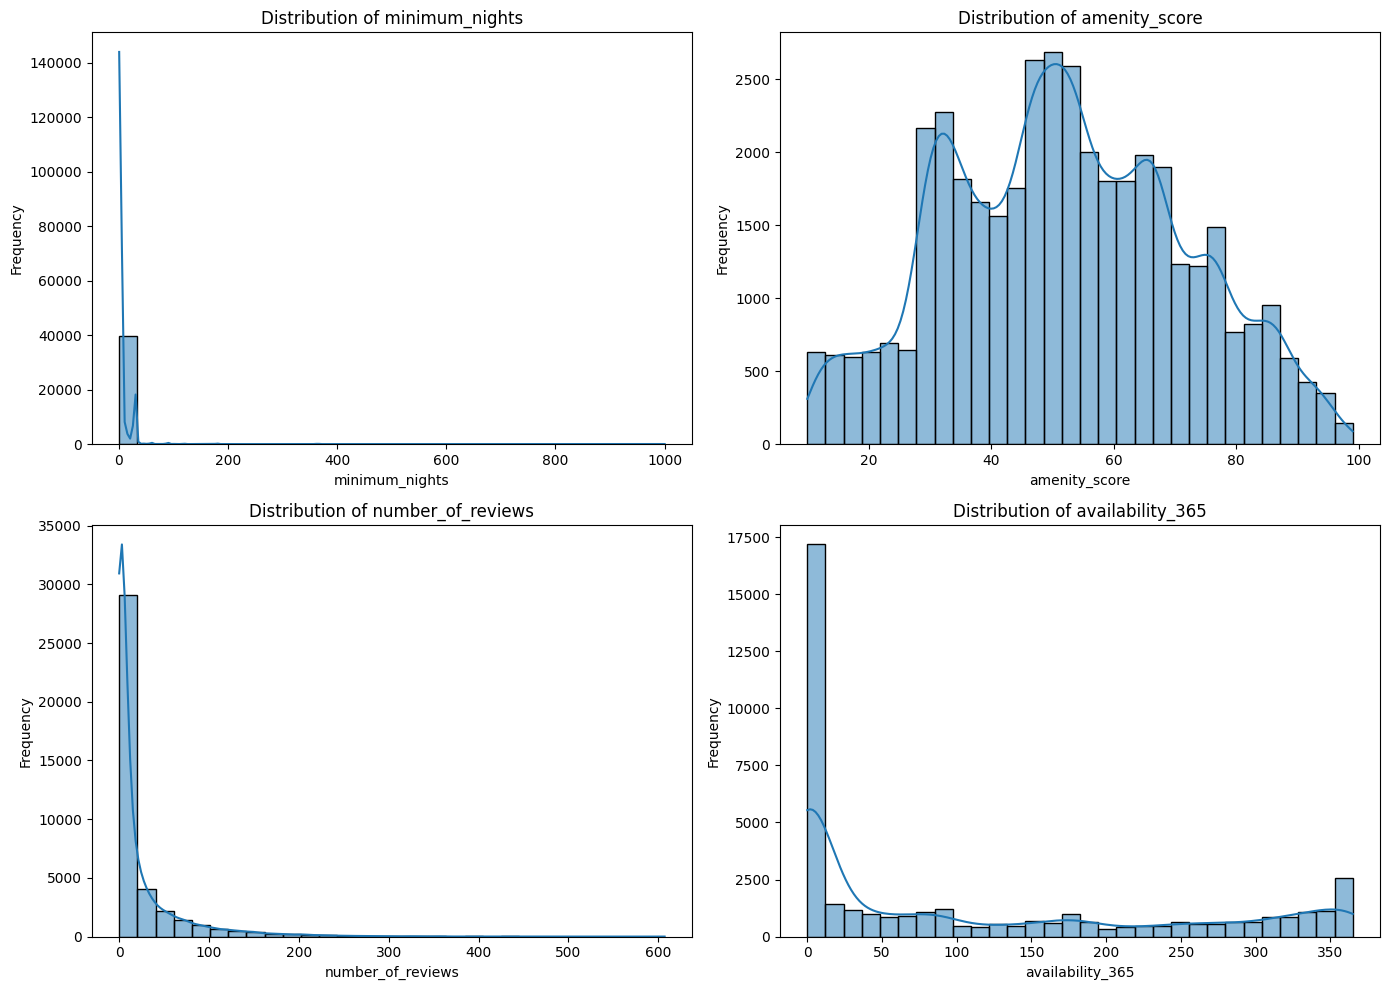

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(full_train_df[col].dropna(), ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
save_path = output_dir / 'numeric_distributions.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

 ### Handling Missing Values

In [11]:
missing = full_train_df.isnull().sum()
missing_pct = (missing / len(full_train_df) * 100).round(2)
missing_info = pd.DataFrame({'Missing Count': missing, 'Percentage (%)': missing_pct})
missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print('Missing Values in the Full Training Set')
print(missing_info)

Missing Values in the Full Training Set
                     Missing Count  Percentage (%)
minimum_nights                1322            3.20
number_of_reviews             1123            2.72
amenity_score                  916            2.22
neighbourhood_group            839            2.03
room_type                      611            1.48
availability_365               595            1.44


In [12]:
missing_cols = ['neighbourhood_group', 'room_type', 'minimum_nights', 
                'amenity_score', 'number_of_reviews', 'availability_365']

print("Chi-Square Test for Independence")
print(f"{'Feature':<20} | {'Chi2':<10} | {'DOF':<5} | {'P-Value':<10} | {'Inference'}")
print("-" * 75)

mnar_features = [] # Store features where missingness is informative

for col in missing_cols:
    # Create binary mask (1=Missing, 0=Present)
    # This represents the random variable M_j
    missing_mask = full_train_df[col].isnull()
    
    # Contingency Table: Missingness (2 levels) vs Price Class (4 levels)
    contingency = pd.crosstab(missing_mask, full_train_df['price_class'])
    
    # Compute Chi-Square Statistic
    # Returns: chi2 stat, p-value, degrees of freedom, expected frequencies
    chi2, p, dof, _ = chi2_contingency(contingency)
    
    # Inference
    inference = "Dependent (MNAR)" if p < 0.05 else "Independent (MCAR)"
    print(f"{col:<20} | {chi2:<10.2f} | {dof:<5} | {p:<10.4f} | {inference}")

Chi-Square Test for Independence
Feature              | Chi2       | DOF   | P-Value    | Inference
---------------------------------------------------------------------------
neighbourhood_group  | 1.10       | 3     | 0.7769     | Independent (MCAR)
room_type            | 0.68       | 3     | 0.8782     | Independent (MCAR)
minimum_nights       | 11.74      | 3     | 0.0083     | Dependent (MNAR)
amenity_score        | 42.90      | 3     | 0.0000     | Dependent (MNAR)
number_of_reviews    | 14.87      | 3     | 0.0019     | Dependent (MNAR)
availability_365     | 6.62       | 3     | 0.0851     | Independent (MCAR)


### Imputation Implementation

In [13]:
# Initial Split (80/20)
train_df, val_df = train_test_split(
    full_train_df, 
    test_size=0.20, 
    random_state=42, 
    stratify=full_train_df['price_class']
)

print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")

# Define the features requiring specific handling
num_cols = ['minimum_nights', 'amenity_score', 'number_of_reviews', 'availability_365']
cat_cols = ['neighbourhood_group', 'room_type']
mnar_cols = ['amenity_score', 'minimum_nights', 'number_of_reviews']

# Create Missingness Flags BEFORE filling
for col in mnar_cols:
    train_df[f'{col}_is_missing'] = train_df[col].isnull().astype(float)
    val_df[f'{col}_is_missing'] = val_df[col].isnull().astype(float)

# Impute Numerical Columns with Medians from TRAIN_DF only
for col in num_cols:
    # Calculate median on TRAIN ONLY
    median_val = train_df[col].median()
    
    # Fill both sets with the TRAINING median
    train_df[col] = train_df[col].fillna(median_val)
    val_df[col] = val_df[col].fillna(median_val)
    test_df[col]  = test_df[col].fillna(median_val)

# Impute Categorical Columns with 'Unknown'
for col in cat_cols:
    train_df[col] = train_df[col].fillna('Unknown')
    val_df[col] = val_df[col].fillna('Unknown')
    test_df[col]  = test_df[col].fillna('Unknown')

print("\nMissing values in train_df after imputation:", train_df.isnull().sum().sum())
print("Missing values in val_df after imputation:", val_df.isnull().sum().sum())

Training samples: 33078
Validation samples: 8270

Missing values in train_df after imputation: 0
Missing values in val_df after imputation: 0


In [14]:
print(train_df.columns)

Index(['neighbourhood_group', 'room_type', 'minimum_nights', 'amenity_score',
       'number_of_reviews', 'availability_365', 'price_class',
       'amenity_score_is_missing', 'minimum_nights_is_missing',
       'number_of_reviews_is_missing'],
      dtype='str')


### Class distribution

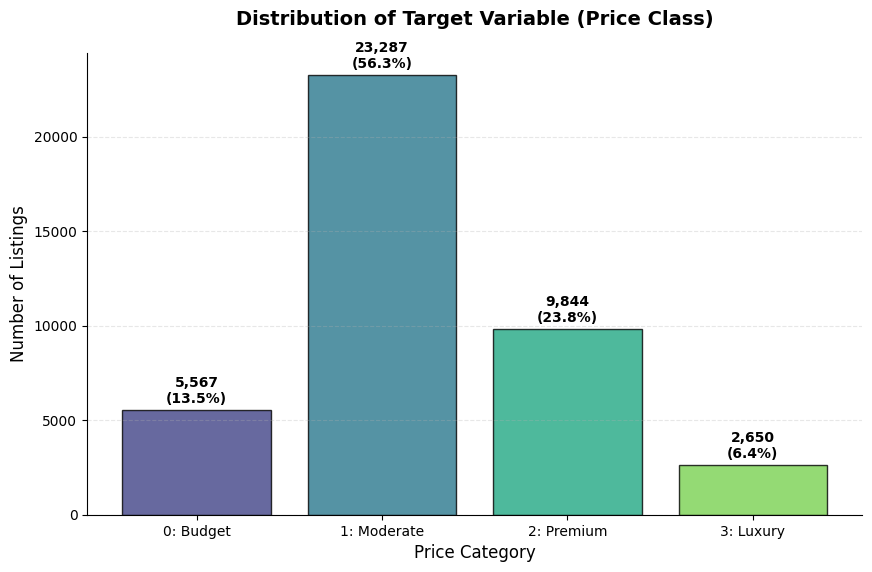

Class Distribution:
price_class
0    0.134638
1    0.563195
2    0.238077
3    0.064090
Name: proportion, dtype: float64


In [15]:
# Ensure output directory exists
output_dir = Path('../outputs')
output_dir.mkdir(parents=True, exist_ok=True)

# Calculate Statistics
class_counts = full_train_df['price_class'].value_counts().sort_index()
class_props = full_train_df['price_class'].value_counts(normalize=True).sort_index()

# Define labels
labels = ['0: Budget', '1: Moderate', '2: Premium', '3: Luxury']
colors = sns.color_palette("viridis", n_colors=4)

# Create Visualization
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(labels, class_counts, color=colors, edgecolor='black', alpha=0.8)

# Add Annotations (Count & Percentage)
for bar, count, prop in zip(bars, class_counts, class_props):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 200, 
        f'{count:,}\n({prop:.1%})', 
        ha='center', va='bottom', fontweight='bold', fontsize=10
    )

# Styling
ax.set_title('Distribution of Target Variable (Price Class)', fontsize=14, fontweight='bold', pad=20)
ax.set_ylabel('Number of Listings', fontsize=12)
ax.set_xlabel('Price Category', fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.3)

# Save
save_path = output_dir / 'target_distribution.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Class Distribution:\n{class_props}")

In [16]:
print("Number of samples in each class of price_class:")
print(class_counts)

Number of samples in each class of price_class:
price_class
0     5567
1    23287
2     9844
3     2650
Name: count, dtype: int64


### Normalization

In [17]:
num_cols = ['minimum_nights', 'amenity_score', 'number_of_reviews', 'availability_365']
skewed_features = ['minimum_nights', 'number_of_reviews']

train_df[skewed_features] = np.log1p(train_df[skewed_features])
val_df[skewed_features] = np.log1p(val_df[skewed_features])
test_df[skewed_features]  = np.log1p(test_df[skewed_features])

# Initialize scaler
scaler = StandardScaler()

# Fit on TRAIN, Transform ALL
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
val_df[num_cols] = scaler.transform(val_df[num_cols])
test_df[num_cols]  = scaler.transform(test_df[num_cols])

print(f"Train Mean:\n{train_df[num_cols].mean().round(3)}\n")
print(f"Train Std:\n{train_df[num_cols].std().round(3)}\n")
print(f"Test Mean:\n{test_df[num_cols].mean().round(3)}")

Train Mean:
minimum_nights       0.0
amenity_score       -0.0
number_of_reviews    0.0
availability_365    -0.0
dtype: float64

Train Std:
minimum_nights       1.0
amenity_score        1.0
number_of_reviews    1.0
availability_365     1.0
dtype: float64

Test Mean:
minimum_nights      -0.009
amenity_score        0.110
number_of_reviews   -0.013
availability_365     0.017
dtype: float64


Original Skewness:
minimum_nights       20.906450
number_of_reviews     3.611505
dtype: float64

Log-Transformed Skewness:
minimum_nights       1.481135
number_of_reviews    0.336479
dtype: float64


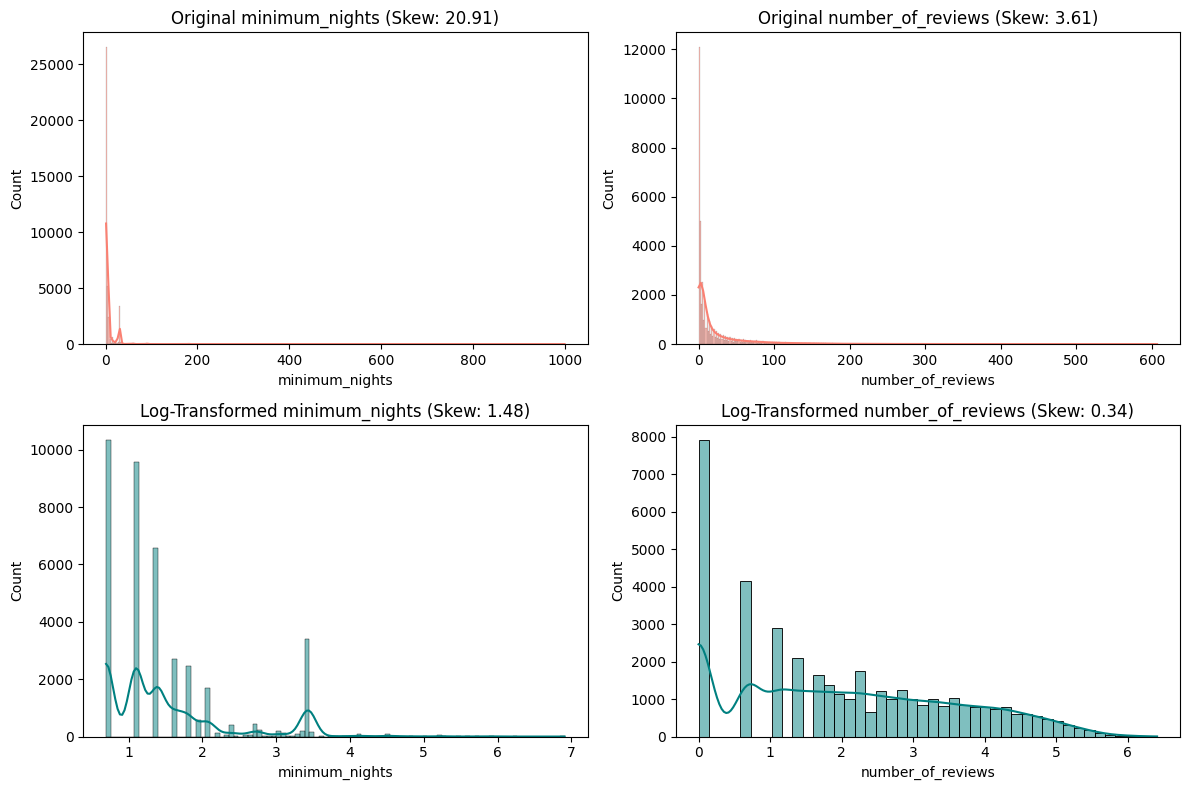

In [18]:
cols = ['minimum_nights', 'number_of_reviews']

# Calculate original skewness
print("Original Skewness:")
print(full_train_df[cols].skew())

# Visualize Original vs Log Transformed
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, col in enumerate(cols):
    # Original
    sns.histplot(full_train_df[col].dropna(), kde=True, ax=axes[0, i], color='salmon')
    axes[0, i].set_title(f'Original {col} (Skew: {full_train_df[col].skew():.2f})')
    
    # Log Transformed
    log_data = np.log1p(full_train_df[col].dropna())
    sns.histplot(log_data, kde=True, ax=axes[1, i], color='teal')
    axes[1, i].set_title(f'Log-Transformed {col} (Skew: {log_data.skew():.2f})')

plt.tight_layout()
print("\nLog-Transformed Skewness:")
save_path = output_dir / 'skewness_comparison.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(np.log1p(full_train_df[cols]).skew())

### Feature Encoding

In [19]:
# 1. Initialize Encoder
# handle_unknown='ignore' is crucial: if a new category appears in test, it won't crash
# sparse_output=False gives us a dense numpy array/dataframe
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# 2. Select Categorical Columns
cat_cols = ['neighbourhood_group', 'room_type']

# 3. Fit on TRAIN, Transform ALL THREE
# 'fit' learns the categories (Manhattan, Brooklyn, etc.) from Train
train_cat_encoded = ohe.fit_transform(train_df[cat_cols])
val_cat_encoded   = ohe.transform(val_df[cat_cols])
test_cat_encoded  = ohe.transform(test_df[cat_cols])

# 4. Convert back to DataFrames
feature_names = ohe.get_feature_names_out(cat_cols)

train_cat_df = pd.DataFrame(train_cat_encoded, columns=feature_names, index=train_df.index)
val_cat_df   = pd.DataFrame(val_cat_encoded,   columns=feature_names, index=val_df.index)
test_cat_df  = pd.DataFrame(test_cat_encoded,  columns=feature_names, index=test_df.index)

# 5. Concatenate with numerical data (dropping original strings)
train_encoded = pd.concat([train_df.drop(cat_cols, axis=1), train_cat_df], axis=1)
val_encoded   = pd.concat([val_df.drop(cat_cols, axis=1),   val_cat_df],   axis=1)
test_encoded  = pd.concat([test_df.drop(cat_cols, axis=1),  test_cat_df],  axis=1)

print("Encoding Complete.")
print(f"Train Features: {train_encoded.shape[1]}")
print(f"Val Features: {val_encoded.shape[1]}")
print(f"Test Features:  {test_encoded.shape[1]}")

Encoding Complete.
Train Features: 18
Val Features: 18
Test Features:  15


#### Alignment Fix

In [20]:
# Align Columns between Train and Test
# (Test set is missing the '_is_missing' flags because it had no NaNs)

# Identify missing columns
missing_cols = set(train_encoded.columns) - set(test_encoded.columns)
print(f"Fixing missing columns in Test: {missing_cols}")

# Add them to Test with 0s
for col in missing_cols:
    test_encoded[col] = 0.0

# Separate Features (X) and Target (y)
# We drop price_class from X
X_train = train_encoded.drop('price_class', axis=1)
y_train = train_encoded['price_class']

X_val   = val_encoded.drop('price_class', axis=1)
y_val   = val_encoded['price_class']

# Handle Test
if 'price_class' in test_encoded.columns:
    X_test = test_encoded.drop('price_class', axis=1)
    y_test = test_encoded['price_class']
else:
    X_test = test_encoded.copy()

# Enforce Column Order
X_test = X_test[X_train.columns]

print("-" * 30)
print(f"Final Train Shape: {X_train.shape}")
print(f"Final Test Shape:  {X_test.shape}")
print(f"Columns Match? {list(X_train.columns) == list(X_test.columns)}")

Fixing missing columns in Test: {'amenity_score_is_missing', 'number_of_reviews_is_missing', 'minimum_nights_is_missing'}
------------------------------
Final Train Shape: (33078, 17)
Final Test Shape:  (7297, 17)
Columns Match? True


### Bivariate Analysis

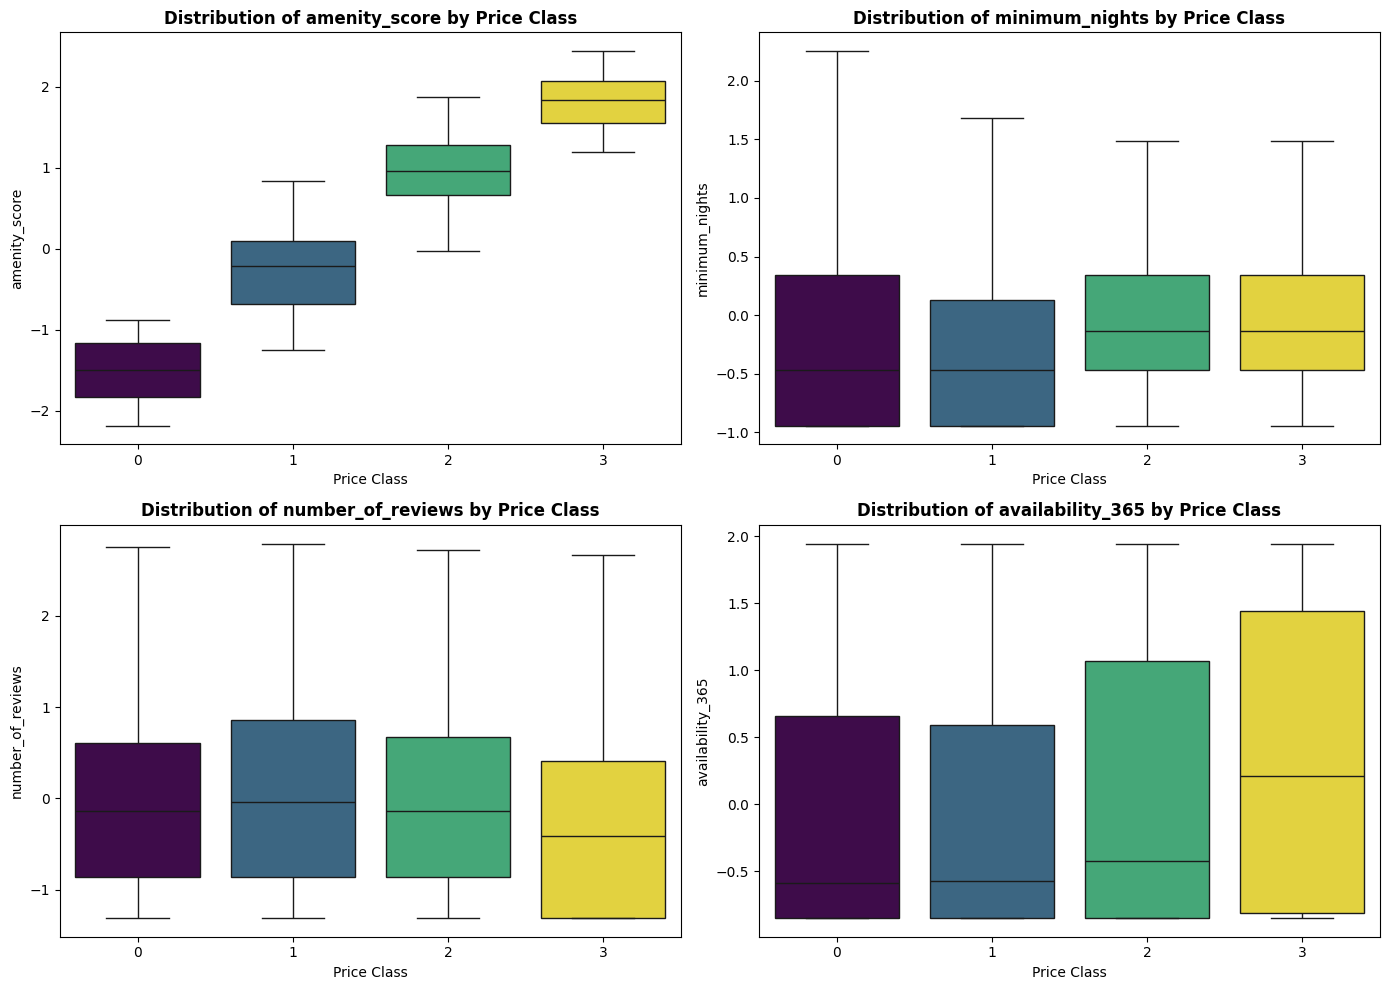

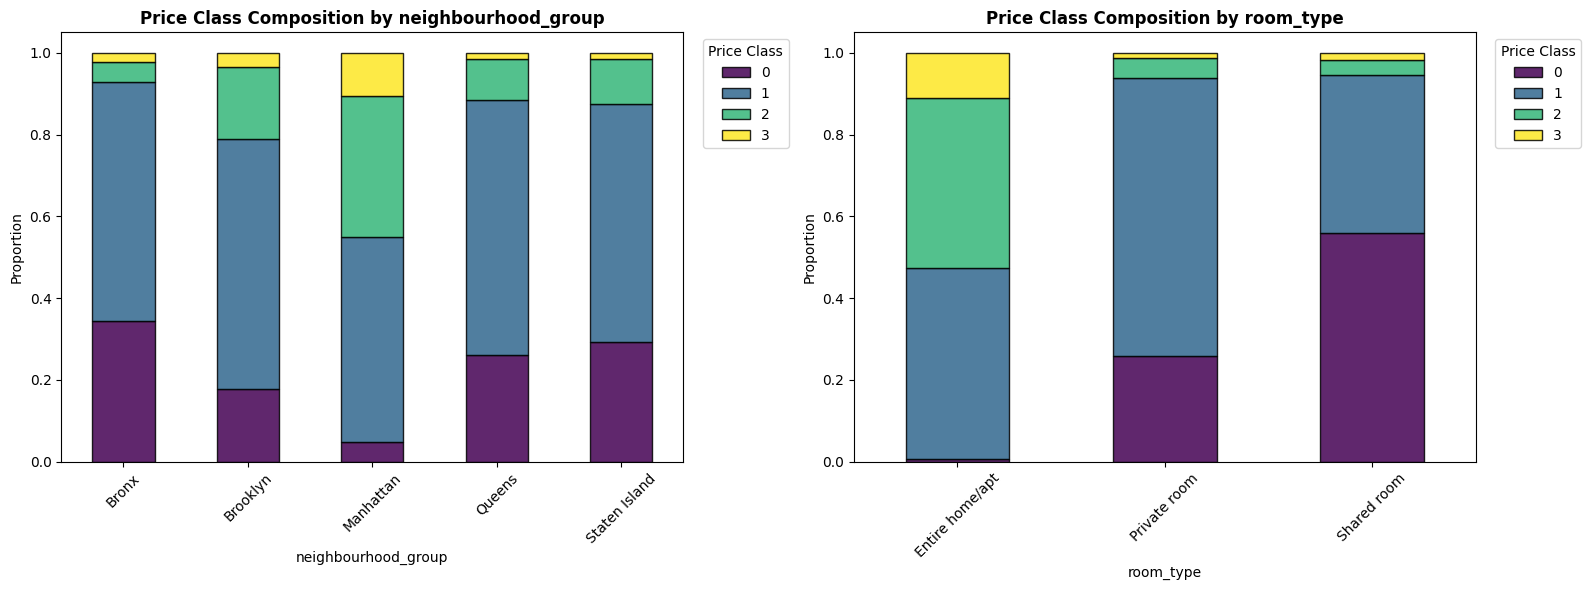

In [21]:
num_cols = ['amenity_score', 'minimum_nights', 'number_of_reviews', 'availability_365']
cat_cols = ['neighbourhood_group', 'room_type']

# Numerical Features vs Price Class (Boxplots)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(
        x='price_class', 
        y=col, 
        hue='price_class',
        data=train_df, 
        ax=axes[i], 
        showfliers=False, 
        palette='viridis', 
        legend=False
    )
    
    axes[i].set_title(f'Distribution of {col} by Price Class', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Price Class')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.savefig(output_dir / 'bivariate_numeric.png', dpi=300, bbox_inches='tight')
plt.show()

# Re-create a temporary "Raw Train" dataframe for visualization
# We use the same random_state so indices match perfectly
X_train_raw, _ = train_test_split(
    full_train_df, 
    test_size=0.20, 
    random_state=42, 
    stratify=full_train_df['price_class']
)

# Categorical Features vs Price Class (Stacked Bar)
fig2, axes2 = plt.subplots(1, 2, figsize=(16, 6))

for i, col in enumerate(cat_cols):
    # Calculate row-wise proportions (normalize='index')
    props = pd.crosstab(X_train_raw[col], X_train_raw['price_class'], normalize='index')
    props.plot(kind='bar', stacked=True, ax=axes2[i], colormap='viridis', edgecolor='black', alpha=0.85)
    
    axes2[i].set_title(f'Price Class Composition by {col}', fontsize=12, fontweight='bold')
    axes2[i].set_ylabel('Proportion')
    axes2[i].set_xlabel(col)
    axes2[i].legend(title='Price Class', bbox_to_anchor=(1.02, 1), loc='upper left')
    axes2[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(output_dir / 'bivariate_categorical.png', dpi=300, bbox_inches='tight')
plt.show()

### Pairwise Correlation

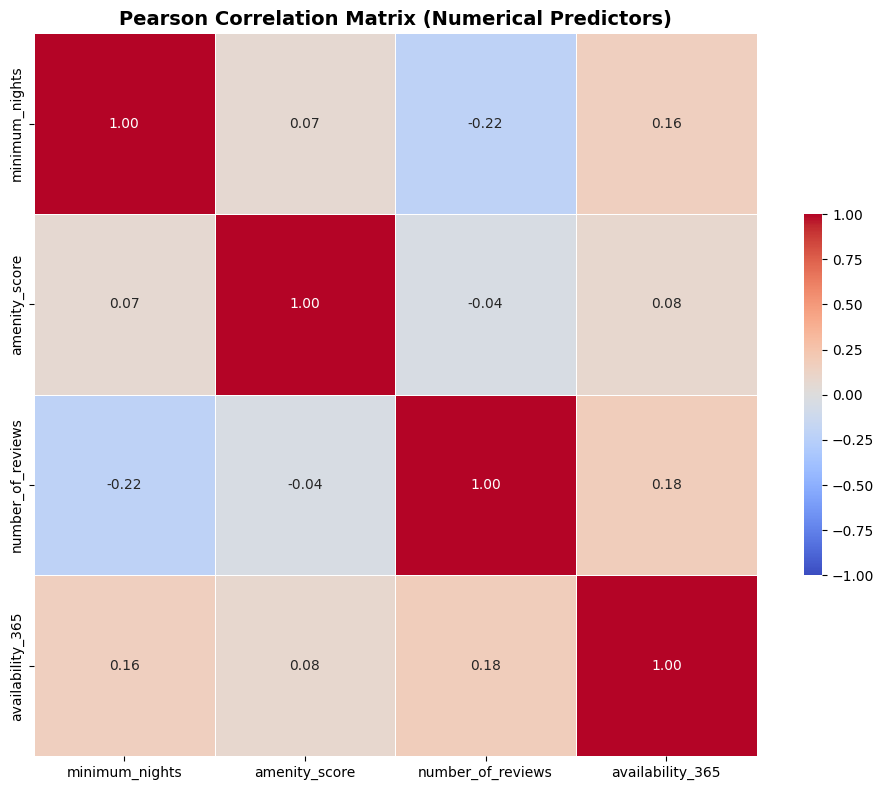

In [22]:
num_cols = ['minimum_nights', 'amenity_score', 'number_of_reviews', 'availability_365']

corr_matrix = train_df[num_cols].corr()

# Plot Heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    corr_matrix, 
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    vmin=-1, vmax=1,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5}
)

plt.title('Pearson Correlation Matrix (Numerical Predictors)', fontsize=14, fontweight='bold')
plt.tight_layout()

# Save
save_path = output_dir / 'correlation_matrix.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

In [23]:
print(X_train.columns)

Index(['minimum_nights', 'amenity_score', 'number_of_reviews',
       'availability_365', 'amenity_score_is_missing',
       'minimum_nights_is_missing', 'number_of_reviews_is_missing',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'neighbourhood_group_Unknown',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'room_type_Unknown'],
      dtype='str')


---
# Part B (a): MLP

In [24]:
# Add src to system path to import the MLP class
sys.path.append(os.path.abspath('../src'))
from mlp import TwoLayerMLP

# Transpose Data to be (Features, N)
X_train_T = X_train.values.astype(float).T
y_train_np = y_train.values.astype(int)

X_val_T = X_val.values.astype(float).T
y_val_np = y_val.values.astype(int)

print(f"Input Shape: {X_train_T.shape}")

M0 = X_train_T.shape[0] # 17 Features
M1 = 64
M2 = 32
M3 = 4

print("Training Sigmoid...")
mlp_sig = TwoLayerMLP(M0, M1, M2, M3, activation='sigmoid', learning_rate=0.1)
hist_sig = mlp_sig.train(X_train_T, y_train_np, X_val_T, y_val_np, iterations=300)

print("Training ReLU...")
mlp_relu = TwoLayerMLP(M0, M1, M2, M3, activation='relu', learning_rate=0.01)
hist_relu = mlp_relu.train(X_train_T, y_train_np, X_val_T, y_val_np, iterations=300)

Input Shape: (17, 33078)
Training Sigmoid...
Iter 0: Loss 1.5787 | Train Acc 0.2088 | Val Acc 0.2381
Iter 20: Loss 1.1051 | Train Acc 0.5632 | Val Acc 0.5632
Iter 40: Loss 1.0989 | Train Acc 0.5632 | Val Acc 0.5632
Iter 60: Loss 1.0932 | Train Acc 0.5632 | Val Acc 0.5632
Iter 80: Loss 1.0868 | Train Acc 0.5632 | Val Acc 0.5632
Iter 100: Loss 1.0795 | Train Acc 0.5632 | Val Acc 0.5632
Iter 120: Loss 1.0710 | Train Acc 0.5632 | Val Acc 0.5632
Iter 140: Loss 1.0611 | Train Acc 0.5632 | Val Acc 0.5632
Iter 160: Loss 1.0493 | Train Acc 0.5632 | Val Acc 0.5632
Iter 180: Loss 1.0354 | Train Acc 0.5632 | Val Acc 0.5632
Iter 200: Loss 1.0190 | Train Acc 0.5632 | Val Acc 0.5632
Iter 220: Loss 0.9998 | Train Acc 0.5632 | Val Acc 0.5632
Iter 240: Loss 0.9779 | Train Acc 0.5632 | Val Acc 0.5632
Iter 260: Loss 0.9534 | Train Acc 0.5747 | Val Acc 0.5773
Iter 280: Loss 0.9268 | Train Acc 0.6002 | Val Acc 0.6000
Training ReLU...
Iter 0: Loss 1.4816 | Train Acc 0.2105 | Val Acc 0.2446
Iter 20: Loss 1.07

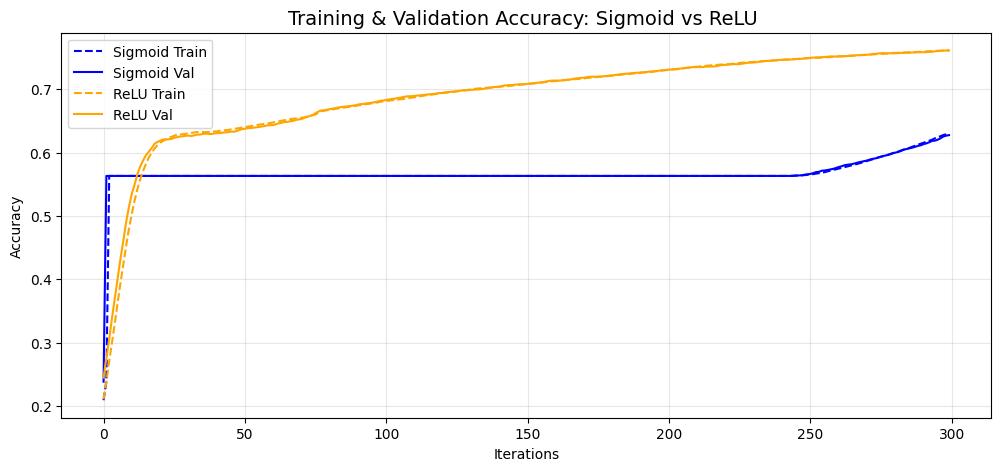

Final Sigmoid Accuracy: Train: 0.6308, Val: 0.6277
Final ReLU Accuracy:    Train: 0.7618, Val: 0.7614


In [25]:

# Plotting
plt.figure(figsize=(12, 5))

# Plot Sigmoid
plt.plot(hist_sig['train_acc'], label='Sigmoid Train', color='blue', linestyle='--')
plt.plot(hist_sig['val_acc'], label='Sigmoid Val', color='blue')

# Plot ReLU
plt.plot(hist_relu['train_acc'], label='ReLU Train', color='orange', linestyle='--')
plt.plot(hist_relu['val_acc'], label='ReLU Val', color='orange')

plt.title('Training & Validation Accuracy: Sigmoid vs ReLU ', fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('../outputs/mlp_activation_comparison.png')
plt.show()

# Final Report
print(f"Final Sigmoid Accuracy: Train: {hist_sig['train_acc'][-1]:.4f}, Val: {hist_sig['val_acc'][-1]:.4f}")
print(f"Final ReLU Accuracy:    Train: {hist_relu['train_acc'][-1]:.4f}, Val: {hist_relu['val_acc'][-1]:.4f}")

### Gradient Magnitude Comparison

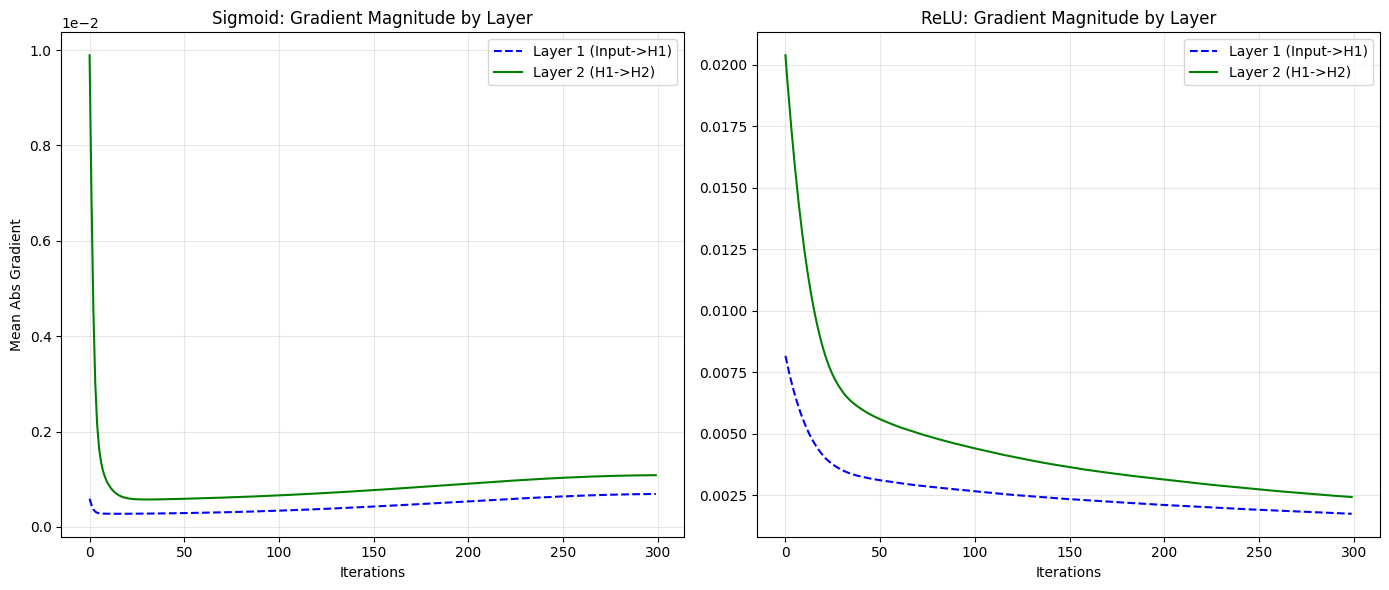

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Sigmoid Gradients
axes[0].plot(hist_sig['grad_w1'], label='Layer 1 (Input->H1)', color='blue', linestyle='--')
axes[0].plot(hist_sig['grad_w2'], label='Layer 2 (H1->H2)', color='green')
axes[0].set_title('Sigmoid: Gradient Magnitude by Layer')
axes[0].set_xlabel('Iterations')
axes[0].set_ylabel('Mean Abs Gradient')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
# Force scientific notation if values are tiny
axes[0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

# Plot 2: ReLU Gradients
axes[1].plot(hist_relu['grad_w1'], label='Layer 1 (Input->H1)', color='blue', linestyle='--')
axes[1].plot(hist_relu['grad_w2'], label='Layer 2 (H1->H2)', color='green')
axes[1].set_title('ReLU: Gradient Magnitude by Layer')
axes[1].set_xlabel('Iterations')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/gradient_magnitude_comparison.png')
plt.show()

### Gradient-based Feature Attribution

Validation Accuracy: 0.7614
Computing attribution on 6297 correctly classified samples...

Top 10 Most Influential Features (Aggarwal Method):
                             Feature  Importance
0                      amenity_score    0.590934
1                     minimum_nights    0.546635
2             room_type_Private room    0.410353
3          minimum_nights_is_missing    0.409275
4         neighbourhood_group_Queens    0.379081
5  neighbourhood_group_Staten Island    0.377836
6       neighbourhood_group_Brooklyn    0.373263
7        neighbourhood_group_Unknown    0.310605
8      neighbourhood_group_Manhattan    0.304349
9          neighbourhood_group_Bronx    0.268833


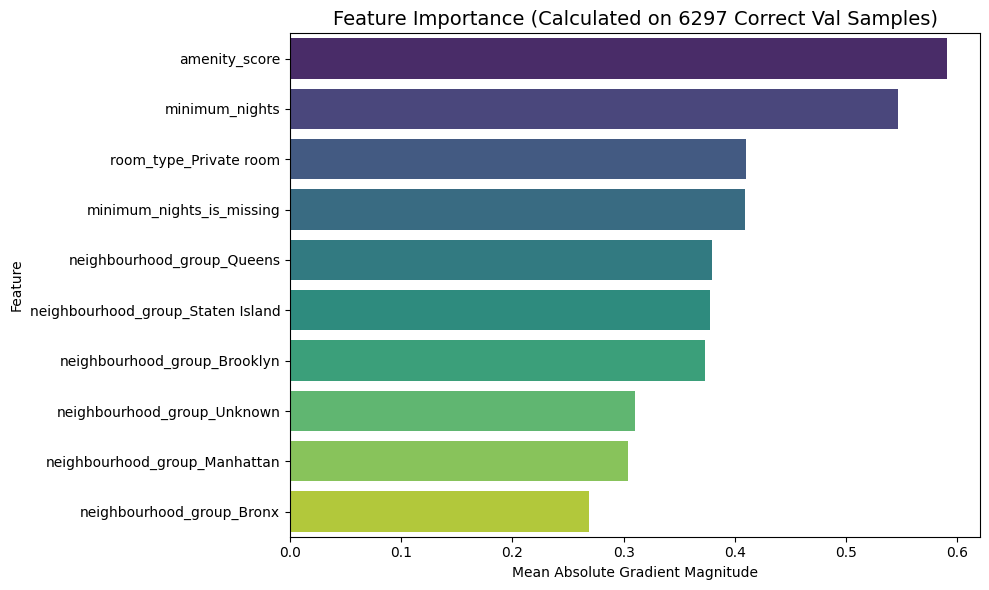

In [27]:
def compute_attribution(model, X_batch, feature_names):
    """
    Implements Gradient-Based Feature Attribution (Sensitivity Analysis)
    based on Aggarwal Section 2.8.
    
    Computes |d(Score_winning_class) / dx|
    """
    N = X_batch.shape[1]
    M3 = model.W3.shape[0] # Number of classes (4)
    
    # Forward Pass
    # We need the pre-activations (A) and activations (X) for backprop

    # Layer 1
    A1 = model.W1 @ X_batch + model.b1
    if model.activation_mode == 'sigmoid':
        X1 = model._sigmoid(A1)
    else:
        X1 = model._relu(A1)
        
    # Layer 2
    A2 = model.W2 @ X1 + model.b2
    if model.activation_mode == 'sigmoid':
        X2 = model._sigmoid(A2)
    else:
        X2 = model._relu(A2)
        
    # Layer 3 (Output Logits)
    # We stop at A3 (Logits) because we want sensitivity of the *score*
    # not the softmax probability.
    A3 = model.W3 @ X2 + model.b3
    
    # Identify Winning Class
    # Get index of the highest score for each sample
    winning_classes = np.argmax(A3, axis=0)
    
    # Define Output Gradient
    # Instead of Loss Gradient (y_hat - y), we backpropagate 
    # a "1" for the winning class and "0" for others.
    delta3 = np.zeros_like(A3)
    # Indexing to set 1.0 for the winning class of each sample
    delta3[winning_classes, np.arange(N)] = 1.0
    
    # Backward Pass (Sensitivity Propagation)
    
    # Backprop to Layer 2
    # Gradient of Layernorm/Linear: W3.T @ delta3
    error_prop2 = model.W3.T @ delta3
    
    # Multiply by derivative of activation function g'(A2)
    if model.activation_mode == 'sigmoid':
        g_prime_2 = X2 * (1 - X2)
    else:
        g_prime_2 = (A2 > 0).astype(float)
        
    delta2 = error_prop2 * g_prime_2
    
    # Backprop to Layer 1
    error_prop1 = model.W2.T @ delta2
    
    if model.activation_mode == 'sigmoid':
        g_prime_1 = X1 * (1 - X1)
    else:
        g_prime_1 = (A1 > 0).astype(float)
        
    delta1 = error_prop1 * g_prime_1
    
    # Backprop to Inputs (The Feature Gradients)
    # Gradient w.r.t Input X: W1.T @ delta1
    # Shape: (Features, N)
    input_gradients = model.W1.T @ delta1
    
    # Aggregate Feature Importance
    # Compute the absolute magnitude and aggregate over all instances
    abs_grads = np.abs(input_gradients)
    # Average across all N samples
    feature_importance = np.mean(abs_grads, axis=1)
    
    # Create DataFrame for Ranking
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    })
    
    # Sort descending
    importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
    
    return importance_df



# 1. Get Feature Names
feature_names_list = X_train.columns.tolist()

# 2. Filter for Correct Predictions
# We use X_val_T because it's clean data the model hasn't overfit to, 
# but we have the labels (y_val_np) to verify correctness.

# Forward pass on Validation
probs_val = mlp_relu.forward(X_val_T)
preds_val = np.argmax(probs_val, axis=0)

# Identify correct indices
correct_indices = np.where(preds_val == y_val_np)[0]
accuracy_check = len(correct_indices) / len(y_val_np)

print(f"Validation Accuracy: {accuracy_check:.4f}")
print(f"Computing attribution on {len(correct_indices)} correctly classified samples...")

# Select only the correct columns from X_val_T
# Shape is (Features, Samples), so we slice the second dimension
X_val_correct = X_val_T[:, correct_indices]

# 3. Run Attribution
if X_val_correct.shape[1] > 0:
    sensitivity_df = compute_attribution(mlp_relu, X_val_correct, feature_names_list)

    # 4. Display Results
    print("\nTop 10 Most Influential Features (Aggarwal Method):")
    print(sensitivity_df.head(10))

    # 5. Visualize
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='Importance', 
        y='Feature', 
        hue='Feature',
        data=sensitivity_df.head(10), 
        palette='viridis', 
        legend=False
    )

    plt.title(f"Feature Importance (Calculated on {len(correct_indices)} Correct Val Samples)", fontsize=14)
    plt.xlabel("Mean Absolute Gradient Magnitude")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.savefig('../outputs/feature_importance_aggarwal.png')
    plt.show()
else:
    print("Error: No correctly classified samples found. Check model training.")

### Test set Evaluation and Generalization

In [28]:
# transpose test features to match the model's expected input shape (features x samples)
X_test_T = X_test.values.astype(float).T
y_test_np = y_test.values.astype(int)

# run the test evaluation using the relu model
test_probs = mlp_relu.forward(X_test_T)
test_preds = np.argmax(test_probs, axis=0)
test_acc = np.mean(test_preds == y_test_np)

# retrieve final training and validation accuracies for comparison
final_train_acc = hist_relu['train_acc'][-1]
final_val_acc = hist_relu['val_acc'][-1]

# display the performance comparison
print(f"Final Train Accuracy: {final_train_acc:.4f}")
print(f"Final Val Accuracy:   {final_val_acc:.4f}")
print(f"Final Test Accuracy:  {test_acc:.4f}")

Final Train Accuracy: 0.7618
Final Val Accuracy:   0.7614
Final Test Accuracy:  0.4544
